## Memoria, comportamiento arriesgado y otras cosas peligrosas en el problema del bar El Farol

El problema del bar El Farol (Arthur, 1994) es uno de los más discutidos en la comunidad de sistemas complejos y racionalidad acotada. En efecto, en palabras del mismo Arthur, el problema es "diabóloco" en el sentido de presentar un desafío interesante pero que no es para nada obvio cómo resolver, pues lanza por los aires los intentos más naturales de afrontarlo. FRASE PARA PRESENTAR NUESTRO RESULTADO MÁS IMPORTANTE.

En este problema se tiene una población de $N$ individuos, quienes deben tomar la decisión de si acudirán o no al bar. Cada agente toma esta decisión de manera independiente a los demás, y todos lo hacen de manera simultánea. Si el total de acudientes supera un umbral $\mu$ (usualmente 0.6 de la proporción total de agentes), entonces El Farol se congestionará y los individuos que hayan ido no tendrán una buena experiencia (recompensa=-1). Por otro lado, si el total de los acudientes no supera este umbral, quienes hayan asistido podrán disfrutar de su estadía en el bar (recompensa=1). Adicionalmente, si un individuo no asiste al bar, será indiferente al estado de El Farol (recompensa=0). Cada agente intentará tomar la mejor decisión posible con respecto a asistir o no al bar. Esta situación se repetirá por un número $k$ de iteraciones. 

El problema es "diabóloco" en varios sentidos: (i) no puede haber convergencia en comportamientos (si todos toman la misma decisión, todos pierden); (ii) cuando en una ronda la utilidad es negativa, lo es para una cantidad de agentes mayor que cuando la utilidad es positiva; (iii) la diferencia entre ambos lados del umbral en la asistencia al bar representa un salto abismal en la utilidad de los jugadores.

Curiosamente, no es fácil encontrar una comunalidad de opiniones respecto a qué significa resolver el problema. La propuesta de Arthur consiste en que (a) la asistencia promedio a El Farol esté cerca al umbral. No obstante, otros académicos han propuesto: (b) que se tenga (a) y además que la oscilación de la asistencia sea pequeña; (c) que se maximice la utilidad individual; o (d) que haya equidad en la distribución de la utilidad entre los agentes.

Manteniendonos lo más fieles posible a la formulación original del problema, excepto en la inmersión de los agentes en una red social, en este proyecto exploramos la contribución de varios factores sobre (a)-(d). Consideramos la cantidad de predictores a disposición de cada agente, la memoria usada para hacer las predicciones, y la conectividad entre los agentes.

Los resultados de las simulaciones muestran que a mayor tamaño de la memoria mejor el desempeño de la población respecto a la oscilación de la asistencia y a la distribución de la utilidad, aunque la utilidad promedio de los agentes es 0 o negativa. Por otro lado, se observa que aumentar la cantidad de predictores a disposición de los agentes aumenta la oscilación, lo que conlleva a una menor utilidad. Adicionalmente, al conectar a los agentes en una red aleatoria se observa un aumento en la utilidad para algunos predictores particulares, los cuales incluso llegan a tener utilidades promedio positivas. Esto siempre y cuando la conectividad sea "baja". A la base de este resultado se encuentran los predictores que determinan un comportamiento más arriesgado de los agentes pero que, gracias a las condiciones del problema, representan una mejor posición en la dinámica del sistema. No obstante, esta ventaja de los predictores "arriesgados" desaparece a medida que aumenta la conectividad de los agentes.

En resumen, la dinámica del sistema más apropiada se obtiene cuando el único factor de aprendizaje de los agentes es copiar el predictor más preciso de sus vecinos, siempre y cuando no se tengan muchos vecinos, obteniendo utilidades más elevadas para algunos agentes a costa de una mayor variación en la utilidad individual.

definir: desempeño de la población; utilidad; predictores; conectividad; predictores arriesgados; la dinámica del sistema es más apropiada en el sentido

### Replicación del modelo original

Presentar lo que propone Arthur, como lo replicamos nosotros y llegamos hasta la gráfica de oscilación de la asistencia. 

Es conspicuamente ausente la discusión sobre los pagos.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from DatosGraficos import *

In [2]:
memorias = [9]
predictores = [6]
conectividades = ['0']
data = leer_datos(memorias, predictores, conectividades)
data.head()

Leyendo datos sweep memoria 9 predictores 6 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-6-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           6           1600      0       0       0        0   
1        9           6           1600      1       0       1       -1   
2        9           6           1600      2       0       0        0   
3        9           6           1600      3       0       1        1   
4        9           6           1600      4       0       1       -1   

           Politica  Prediccion  Precision Conectividad  
0         1-ventana          52        NaN            0  
1         1-ventana         100  48.000000            0  
2  5-ventana-espejo          50  38.000000            0  
3  5-ventana-espejo          60  39.333333            0  
4  5-ventana-espejo          56  30.500000            0  
Shape: (1000000, 11)
Memoria value counts: 9    1000000
Name: Memoria, dtype: int64
Predictores value counts: 6    1000000
Name: Num_predic, dtype: int64
Conectividades value counts: 

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision
0,0.0,9,6,1600,0,0,0,0,1-ventana,52,NaN
1,0.0,9,6,1600,1,0,1,-1,1-ventana,100,48.000000
2,0.0,9,6,1600,2,0,0,0,5-ventana-espejo,50,38.000000
3,0.0,9,6,1600,3,0,1,1,5-ventana-espejo,60,39.333333
4,0.0,9,6,1600,4,0,1,-1,5-ventana-espejo,56,30.500000


Text(0, 0.5, 'Attendance')

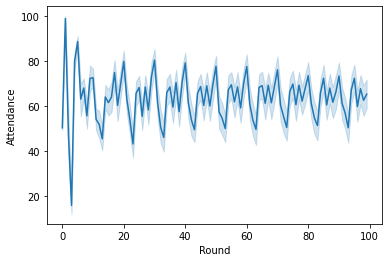

In [3]:
Numero_agentes = max(data['Agente']) + 1
aux = data.groupby(['Identificador', 'Ronda'])['Estado']\
        .sum().reset_index()
aux.columns = ['Identificador',
               'Ronda',
               'Asistencia_total']
aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100
fig, ax = plt.subplots()
sns.lineplot(x='Ronda', y='Asistencia_total', data=aux, ci=95)
ax.set_xlabel('Round')
ax.set_ylabel('Attendance')

### Influencia del tamaño de la memoria

Se ha mostrado que este resultado no es consecuencia de el bounded rationality, sino que se sigue de la ley de los grandes números (cita).

Más importante para el sistema parece ser la varianza en la oscilación de la asistencia. 

Lo que sí disminuye la varianza es el tamaño de la memoria (cita y resultados nuestros).


In [4]:
memorias = [1]
predictores = [1]
conectividades = ['0']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 1 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-1-1-0.csv...


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Listo
Preparando dataframe...
  Memoria Num_predic Identificador Ronda Agente Estado Puntaje  \
1       1          1             0     0      0      1       1   
2       1          1             0     1      0      1      -1   
3       1          1             0     2      0      1       1   
4       1          1             0     3      0      1      -1   
5       1          1             0     4      0      1       1   

           Politica Prediccion Precision Conectividad  
1  2-ciclico-espejo         42       NaN            0  
2  2-ciclico-espejo          0      58.0            0  
3  2-ciclico-espejo         43      57.0            0  
4  2-ciclico-espejo          0      57.0            0  
5  2-ciclico-espejo         43      57.0            0  
Shape: (1000000, 11)
Memoria value counts: 1    1000000
Name: Memoria, dtype: int64
Predictores value counts: 1    1000000
Name: Num_predic, dtype: int64
Conectividades value counts: 0.0    1000000
Name: Conectividad, dtype: int64
Agente

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision,Espejo
1,0.0,1,1,0,0,0,1,1,2-ciclico-espejo,42,NaN,Sí
2,0.0,1,1,0,1,0,1,-1,2-ciclico-espejo,0,58.0,Sí
3,0.0,1,1,0,2,0,1,1,2-ciclico-espejo,43,57.0,Sí
4,0.0,1,1,0,3,0,1,-1,2-ciclico-espejo,0,57.0,Sí
5,0.0,1,1,0,4,0,1,1,2-ciclico-espejo,43,57.0,Sí


Text(0, 0.5, 'Attendance')

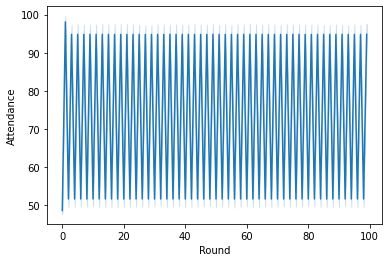

In [5]:
Numero_agentes = max(data['Agente']) + 1
aux = data.groupby(['Identificador', 'Ronda'])['Estado']\
        .sum().reset_index()
aux.columns = ['Identificador',
               'Ronda',
               'Asistencia_total']
aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100
fig, ax = plt.subplots()
sns.lineplot(x='Ronda', y='Asistencia_total', data=aux, ci=95)
ax.set_xlabel('Round')
ax.set_ylabel('Attendance')

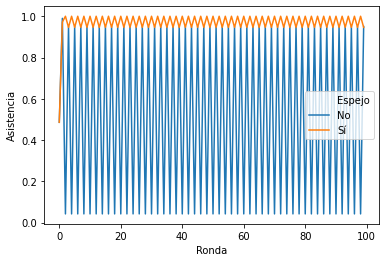

In [6]:
df = data.groupby(['Ronda', 'Espejo'])['Estado'].mean().reset_index(name='Asistencia')
sns.lineplot(x='Ronda', y='Asistencia', data=df, hue='Espejo')

---

In [7]:
memorias = [1, 3, 6, 9, 12]
predictores = [1]
conectividades = ['0']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 1 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-1-1-0.csv...


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Listo
Leyendo datos sweep memoria 3 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-3-1-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 6 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-6-1-0.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0.csv...
Listo
Leyendo datos sweep memoria 12 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-12-1-0.csv...
Listo
Preparando dataframe...
  Memoria Num_predic Identificador Ronda Agente Estado Puntaje  \
1       1          1             0     0      0      1       1   
2       1          1             0     1      0      1      -1   
3       1          1             0     2      0      1       1   
4       1          1             0     3      0      1      -1   
5       1          1             0     4      0      1       1   

           Politica Prediccion Precision Conectividad  
1  2-ciclico-espejo         42       NaN            0  
2  2-ciclico-espejo          0      58.0            0  
3  2-ciclico-espejo         43 

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision
1,0.0,1,1,0,0,0,1,1,2-ciclico-espejo,42,NaN
2,0.0,1,1,0,1,0,1,-1,2-ciclico-espejo,0,58.0
3,0.0,1,1,0,2,0,1,1,2-ciclico-espejo,43,57.0
4,0.0,1,1,0,3,0,1,-1,2-ciclico-espejo,0,57.0
5,0.0,1,1,0,4,0,1,1,2-ciclico-espejo,43,57.0


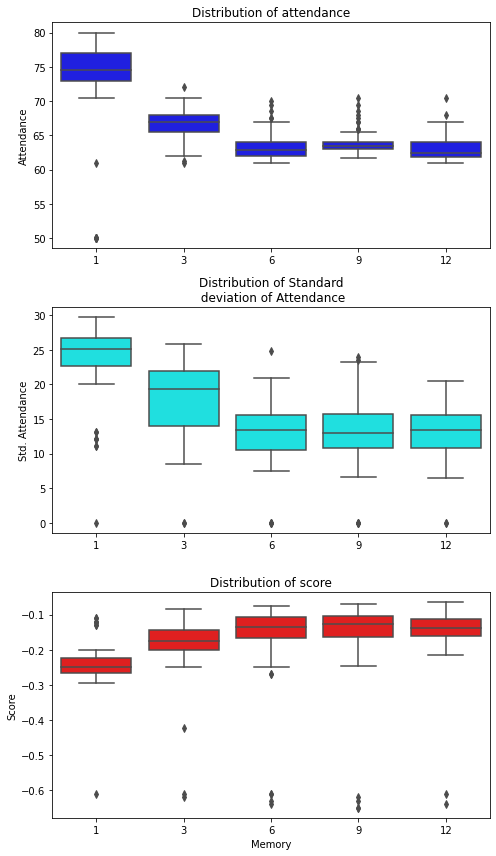

In [8]:
dibuja_vs(data, 'Memoria')

### Influencia del número de predictores

En este artículo analizamos dos parámetros que modifican la posibilidad de aprendizaje de los agentes: el tamaño de la bolsa de predictores y la conectividad con otros agentes.

Consideramos primero el tamaño de la bolsa. El efecto del aumento en el número de predictores usado por los agentes aumenta la oscilación y disminuye el puntaje.

In [11]:
memorias = [9]
predictores = [1, 3, 6, 9, 12]
conectividades = ['0']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-3-0.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-6-0.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-9-0.csv...
Listo
Leyendo datos sweep memoria 9 predictores 12 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-12-0.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           1           1200      0       0       0        0   
1        9           1           1200      1       0       1       -1   
2        9           1           1200      2       0       0        0   
3        9           1           1200      3       0       1       -1   
4        9           1           1200      4       0       0        0   

     Politica  Prediccion  Precis

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision,Espejo
0,0.0,9,1,1200,0,0,0,0,18-ciclico,43,NaN,No
1,0.0,9,1,1200,1,0,1,-1,18-ciclico,100,57.00,No
2,0.0,9,1,1200,2,0,0,0,18-ciclico,54,51.50,No
3,0.0,9,1,1200,3,0,1,-1,18-ciclico,77,42.00,No
4,0.0,9,1,1200,4,0,0,0,18-ciclico,54,37.25,No


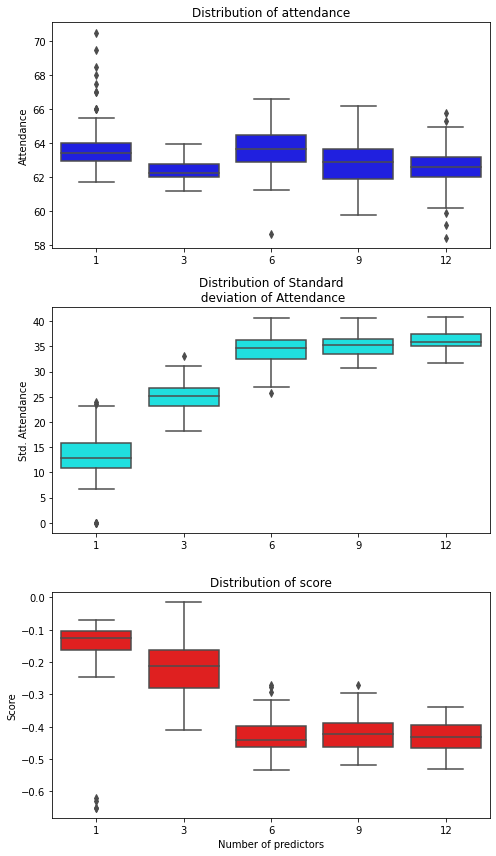

In [10]:
dibuja_vs(data, 'Num_predic')

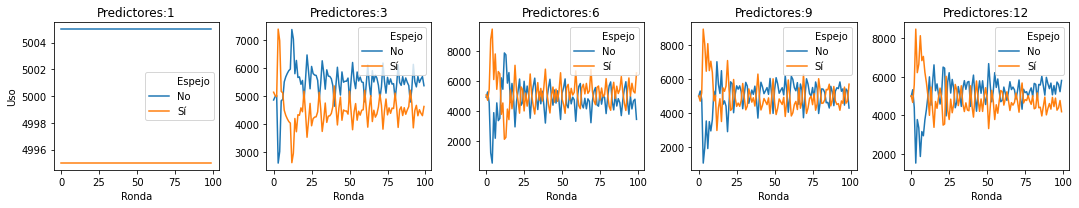

In [12]:
N = 6
predictores = data.Num_predic.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(predictores):
    df = pd.DataFrame(data[data['Num_predic']==float(c)])
    df_uso = df.groupby(['Ronda', 'Espejo'])['Politica'].count().reset_index(name='Uso')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Uso', hue='Espejo', data=df_uso, ax=ax)
    ax.set_title("Predictores:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

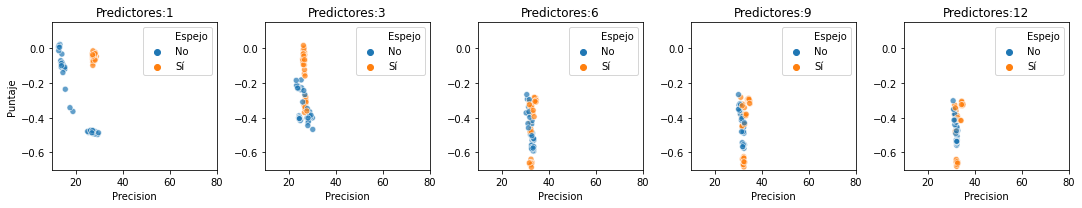

In [13]:
N = 6
data1 = pd.DataFrame(data[data['Ronda']>25])
predictores = data.Num_predic.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(predictores):
    df = pd.DataFrame(data1[data1['Num_predic']==float(c)])
    dfA = df.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean'}).reset_index()
    dfA['Espejo'] = dfA['Politica'].apply(lambda x: 'Sí' if 'espejo' in x else 'No')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision', y='Puntaje', hue='Espejo', data=dfA, ax=ax, alpha=0.7)
    ax.set_title("Predictores:" + str(c))
    ax.set(xlim=(10, 80))    
    ax.set(ylim=(-.7, .15))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

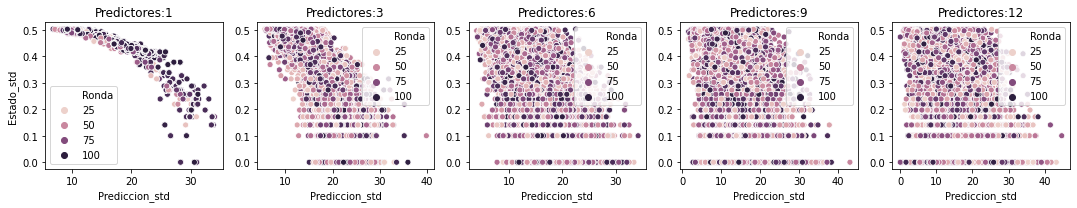

In [16]:
N = 6
data1 = pd.DataFrame(data[data['Ronda']>25])
predictores = data1.Num_predic.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(predictores):
    df = pd.DataFrame(data1[data1['Num_predic']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'std'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Estado_std']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Estado_std', hue='Ronda', data=df, ax=ax)
    ax.set_title("Predictores:" + str(c))
#    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

In [9]:
memorias = [9]
predictores = [1, 3, 6, 9, 12]
conectividades = ['0']
data = leer_datos(memorias, predictores, conectividades, espejos=False)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0-no-espejo.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-3-0-no-espejo.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-6-0-no-espejo.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-9-0-no-espejo.csv...
Listo
Leyendo datos sweep memoria 9 predictores 12 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-12-0-no-espejo.csv...
Archivo no existe! Saltando a siguiente opción
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           1           1200      0       0       1        1   
1        9           1           1200      1       0       1       -1   
2        9           1           1200      2       0       0        0   
3        9           1           1200      3       0       1       -1   
4        9           1    

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision,Espejo
0,0.0,9,1,1200,0,0,1,1,7-ventana,56,NaN,No
1,0.0,9,1,1200,1,0,1,-1,7-ventana,78,44.000000,No
2,0.0,9,1,1200,2,0,0,0,7-ventana,52,61.000000,No
3,0.0,9,1,1200,3,0,1,-1,7-ventana,64,56.666667,No
4,0.0,9,1,1200,4,0,0,0,7-ventana,52,57.500000,No


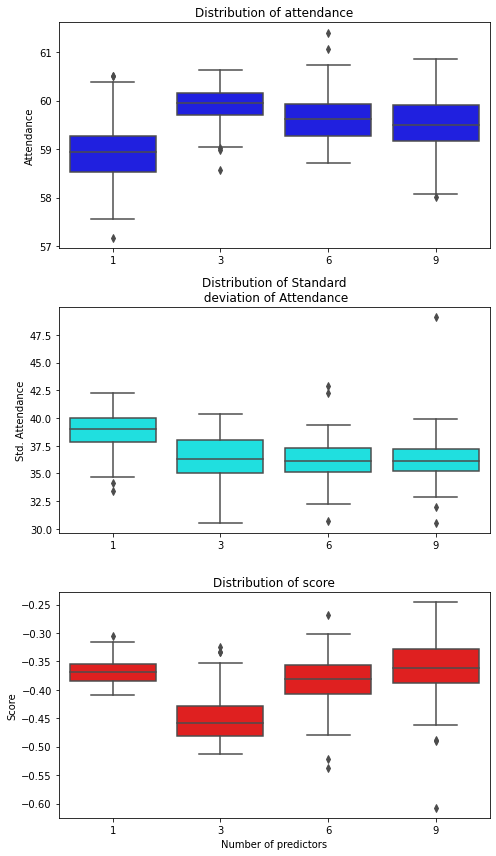

In [6]:
dibuja_vs(data, 'Num_predic')

### Influencia de los grafos

Abstraemos la topología de los grafos y nos concentramos, por simplicidad, en la conectividad entre nodos.

El aumento de conectividad aumenta la varianza.

Para un rango de conectividad, baja un poco la asistencia y surgen outliers en el puntaje positivo.

Por fuera de ese rango, desaparecen los outliers.

In [11]:
memorias = [9]
predictores = [1]
conectividades = ['0', '0.004', '0.008', '0.012', '0.03', '0.5']
data = leer_datos(memorias, predictores, conectividades)
data.head()

Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-1-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-1-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-1-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-1-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.5
Cargando datos de archivo ./data/simulacion-9-1-0.5.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           1           1200      0       0       0        0   
1        9           1           1200      1       0       1       -1   
2        9           1           1200      2       0       0        0   
3        9           1  

,Conectividad,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision
0,0.0,9,1,1200,0,0,0,0,18-ciclico,43,NaN
1,0.0,9,1,1200,1,0,1,-1,18-ciclico,100,57.00
2,0.0,9,1,1200,2,0,0,0,18-ciclico,54,51.50
3,0.0,9,1,1200,3,0,1,-1,18-ciclico,77,42.00
4,0.0,9,1,1200,4,0,0,0,18-ciclico,54,37.25


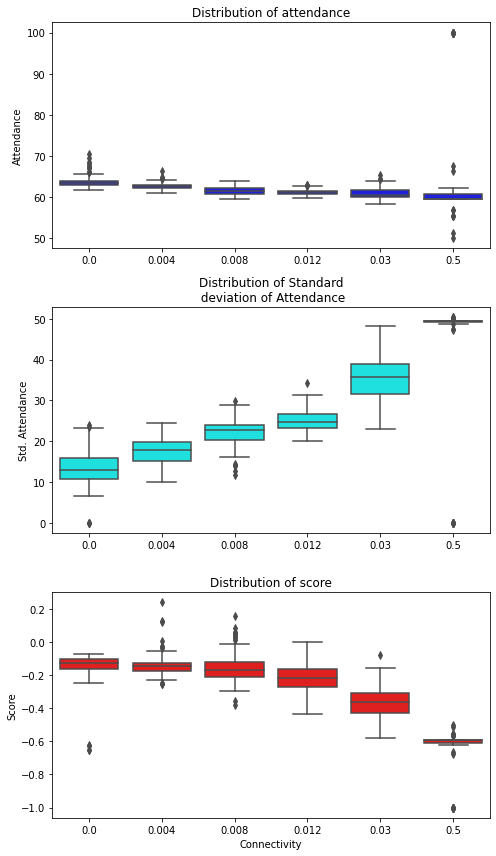

In [13]:
dibuja_vs(data, 'Conectividad')

### Comportamiento ariesgado

¿Quienes ganan? Los predictores espejo.

¿Por qué? Porque siempre van y 

hay menos espejos a medida que aumenta la conectividad.



### Discusión

Se pudieron reproducir resultados anteriores respecto a la tendencia hacia el umbral y la memoria disminuye la varianza. 

Se analiza el comportamiento de los pagos.

Se analiza cómo influye el tamaño de la bolsa de predictores: no cambia el promedio, pero aumenta la varianza y disminuye el puntaje. La propuesta de Arthur no contribuye a solucionar el problema.

Hemos sido fieles a la presentación de Arthur, pero los predictores que usamos son 

Consistentes: Si la asistencia fluctua alrededor de un valor, la predicción también fluctua alrededor de ese valor. => Las espejo no son consistentes.

Insesgadas: aconseja ir una fracción $\frac{L}{N+1}$ de las veces. => Las espejo son sesgadas.

Continuidas: fluctuaciones bajas en la asistencia conyevan fluctuaciones bajas en la predicción. => Las espejo sí son continuas (porque es una resta de un promedio).

Nuestros resultados muestran que las "mejores" estrategias son las inconsistentes y sesgadas (espejo). La razón es porque (i) son menos precisas que las consistentes; y entonces (ii) el aprendizaje basado en la conectividad hace que haya menos estrategias espejo (y con conectividades bajas no desaparecen); y (iii) sugieren más veces asistir.